# DATA 608 - Assignment 4: How much do we get paid?

I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.

For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

Kaggle Link: https://www.kaggle.com/datasets/juanmerinobermejo/data-jobs-dataset/code

## Load Dependencies

In [56]:
# load dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data Loading

In [28]:
# load job data pulled from Kaggle's US Data Jobs Salaries Dataset 
job_url = "https://raw.githubusercontent.com/eddiexunyc/data_608_story_4/refs/heads/main/Resources/jobs.csv"
job_data = pd.read_csv(job_url, encoding = "utf-16", error_bad_lines=False).drop(['ID'], axis=1)

# check data type
job_data.dtypes

/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_95322/2629541512.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  job_data = pd.read_csv(job_url, encoding = "utf-16", error_bad_lines=False).drop(['ID'], axis=1)


Job                  object
Jobs_Group           object
Profile              object
Remote               object
Company              object
Location             object
City                 object
State                object
Salary               object
Frecuency_Salary     object
Low_Salary          float64
High_Salary         float64
Mean_Salary         float64
Skills               object
dtype: object

In [29]:
# view top 10 row of the data
job_data.head(10)

,Job,Jobs_Group,Profile,Remote,Company,Location,City,State,Salary,Frecuency_Salary,Low_Salary,High_Salary,Mean_Salary,Skills
0,Business Analyst,Business Analyst,NaN,NaN,CyberCoders,"Torrington, CT 06790",Torrington,CT,"$80,000 - $110,000 por año",año,80000.0,110000.0,95000.0,[]
1,RPA Business Systems Analyst,Business Analyst,NaN,NaN,Amerihealth,"Philadelphia, PA 19107 (City Center East area)...",Philadelphia,PA,NaN,NaN,NaN,NaN,NaN,"['Office', 'SQL', 'Bachelor']"
2,Quantitive Business Analyst - Strategic Data S...,Business Analyst,NaN,NaN,Apple,"Austin, TX+1 location",Austin,TX,NaN,NaN,NaN,NaN,NaN,"['Python', 'SQL', 'Bachelor']"
3,Business Line Product Lifecycle Management (PL...,Business Analyst,Junior,NaN,NXP Semiconductors,"Austin, TX (West Oak Hill area)",Austin,TX,NaN,NaN,NaN,NaN,NaN,['Bachelor']
4,Global Markets Operations Asset Services Ops S...,Operations Analyst,Senior,NaN,Bank of America,"Jacksonville, FL 32246 (Windy Hill area)+4 loc...",Jacksonville,FL,NaN,NaN,NaN,NaN,NaN,['Excel']
5,"Manager, Product Management: Merchant Offers T...",Others,Lead,Remote,Capital One,"McLean, VA+3 locations",McLean,VA,NaN,NaN,NaN,NaN,NaN,"['MBA', 'Master', 'Agile', 'Bachelor']"
6,Business Systems Analyst - Remote Work Opportu...,Business Analyst,NaN,Remote,Culinary Institute of America,"Hyde Park, NY 12538",Hyde Park,NY,"$70,000 - $80,000 por año",año,70000.0,80000.0,75000.0,"['Access', 'Office', 'SQL', 'Bachelor', '.NET'..."
7,Business Analyst Supply Chain Planning - Recen...,Financial Analyst,NaN,Hybrid,Bluecrux,"Jersey City, NJ",Jersey City,NJ,NaN,NaN,NaN,NaN,NaN,['MBA']
8,Training and placement for Business Analyst,Business Analyst,NaN,NaN,Precision Technologies Corp,"Milltown, NJ 08850+2 locations",Milltown,NJ,$36 - $40 por hora,hora,66240.0,73600.0,69920.0,"['Excel', 'SQL']"
9,"Lead Business Analyst, ASC Customer Reporting ...",Financial Analyst,Lead,Remote,Stryker,Michigan+2 locations,NaN,MI,"$176,800 por año",año,176800.0,176800.0,176800.0,['Bachelor']


## Data Wrangling

In [88]:
# find out distinct job groups in the dataframe
unique_job_group_set = set(job_data['Jobs_Group'])
to_remove = ['Others', 'Controller', 'CFO', 'Statistician/Mathemathics', 'Finance']
data_practitioner_jobs_set = [x for x in unique_job_group_set if x not in to_remove]

# filter out other job groups that are not in data practitioners list
job_filtered_data = job_data[job_data['Jobs_Group'].isin(data_practitioner_jobs_set)]

# drop the frequency salary column
job_filtered_data = job_filtered_data.drop(['Frecuency_Salary'], axis=1)

# filter out missing salary and jobs with remote location
job_filtered_data = job_filtered_data[job_filtered_data['Salary'].notnull()]
job_filtered_data = job_filtered_data[job_filtered_data['Remote'] != 'Remote']

# calculate the mean salary sum group by state and jobs group
job_state_salary_data_mean = round(job_filtered_data.groupby(['State', 'Jobs_Group'])['Mean_Salary'].mean().reset_index(),2)
job_state_salary_data_low = round(job_filtered_data.groupby(['State', 'Jobs_Group'])['Low_Salary'].mean().reset_index(),2)
job_state_salary_data_high = round(job_filtered_data.groupby(['State', 'Jobs_Group'])['High_Salary'].mean().reset_index(),2)

# combine all data into one dataframe and pivot from long to wide format dataset
job_state_combined_data = pd.merge(job_state_salary_data_low, job_state_salary_data_mean, on = ['State', 'Jobs_Group'], how = 'left')
job_state_combined_data = pd.merge(job_state_combined_data, job_state_salary_data_high, on = ['State', 'Jobs_Group'], how = 'left')
job_state_combined_data.head()

job_state_salary_wide_data = pd.pivot(job_state_salary_data_mean, index = 'State', columns= 'Jobs_Group', values = 'Mean_Salary').reset_index()
job_state_salary_wide_data['Total State Salary'] = round(job_state_salary_wide_data.mean(axis=1),2)

job_state_salary_data_mean.head()

/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_95322/43512242.py:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  job_state_salary_wide_data['Total State Salary'] = round(job_state_salary_wide_data.mean(axis=1),2)


,State,Jobs_Group,Mean_Salary
0,AK,Analyst,85394.00
1,AK,Business Analyst,76814.14
2,AK,Data Analyst,78875.77
3,AK,Data Engineer,80090.00
4,AK,Financial Analyst,91251.10


## Data Visualization

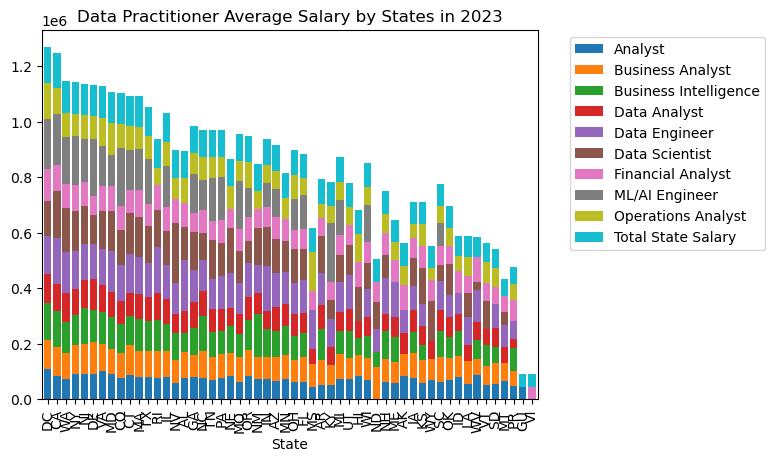

<Figure size 2000x1500 with 0 Axes>

In [89]:
job_state_salary_wide_data = job_state_salary_wide_data.sort_values(by = 'Total State Salary', ascending=False)

job_state_salary_wide_data.plot(x = 'State', kind = 'bar', stacked=True, width = 0.8,
                           title = 'Data Practitioner Average Salary by States in 2023')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.figure(figsize=(20, 15)) 
plt.show()